In [1]:
import pandas as pd
import numpy as np

from Utils import *
from feature_engineering import *

In [2]:
data = pd.read_parquet('../data/processed/data_ready_featuresengineering.parquet')
data = clean_df(data)

In [3]:
data = Categorize_hours(data,4)

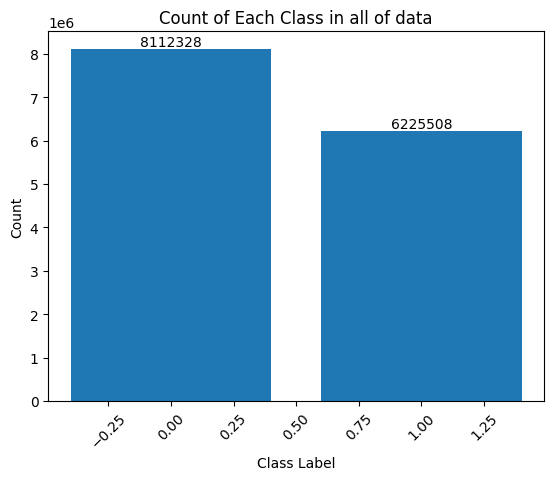

In [4]:
unique_classes, counts = np.unique(data.event, return_counts=True)

# Create a bar plot for each class count within the category
fig, ax = plt.subplots()
ax.bar(unique_classes, counts, label='Counts')

# Add labels and title
ax.set_xlabel('Class Label')
ax.set_ylabel('Count')
ax.set_title('Count of Each Class in all of data')

# Show individual values above each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [5]:
count = 0
array = data.event.copy()
for i in range(len(array)):
    if array[i] == 1:
        count += 1
    elif array[i] == 0 and count != 0:
        array[i-count+1:i] = count
        count = 0

# Handle the case where the sequence of 1s continues until the end of the array
if count != 0:
    for j in range(len(array) - count, len(array)):
        array[j] = count

print(array)

C:\Users\amoha\AppData\Local\Temp\ipykernel_15920\159726762.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '480' has dtype incompatible with uint8, please explicitly cast to a compatible dtype first.
  array[i-count+1:i] = count


0              0
1              0
2              0
3              0
4              0
            ... 
14337831    4703
14337832    4703
14337833    4703
14337834    4703
14337835    4703
Name: event, Length: 14337836, dtype: uint16


In [7]:
threshold = 361
data.event[array < threshold] = 0

C:\Users\amoha\AppData\Local\Temp\ipykernel_15920\1674716498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.event[array < threshold] = 0


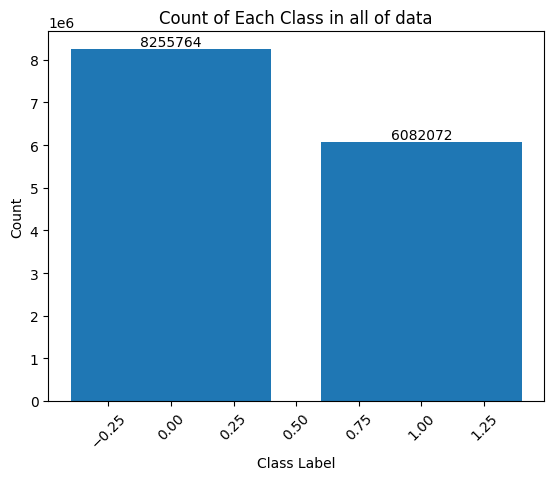

In [8]:
unique_classes, counts = np.unique(data.event, return_counts=True)

# Create a bar plot for each class count within the category
fig, ax = plt.subplots()
ax.bar(unique_classes, counts, label='Counts')

# Add labels and title
ax.set_xlabel('Class Label')
ax.set_ylabel('Count')
ax.set_title('Count of Each Class in all of data')

# Show individual values above each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [16]:
# """
# Replacing sleep duration of below 30 minutes with awake
# """

# threshold = 361
# consecutive_ones = data.event.eq(1).rolling(window=threshold).sum()


# #data.event[consecutive_ones < threshold] = 1

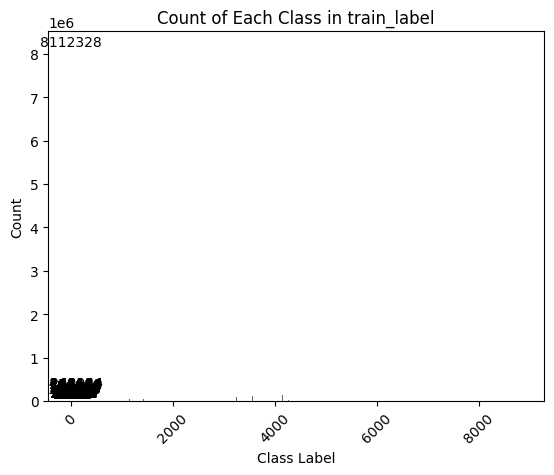

In [9]:
unique_classes, counts = np.unique(array, return_counts=True)

# Create a bar plot for each class count within the category
fig, ax = plt.subplots()
ax.bar(unique_classes, counts, label='Counts')

# Add labels and title
ax.set_xlabel('Class Label')
ax.set_ylabel('Count')
ax.set_title('Count of Each Class in train_label')

# Show individual values above each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [10]:
total_length = len(data)
nu_sections = 4
section_length = total_length // nu_sections
section_length

3584459

In [11]:
test_data = []
train_data = []
val_data = []
test_length = total_length // nu_sections

start_vals = []
end_vals = []
for section in range(nu_sections):
    start_sec = section * test_length
    end_sec = (section + 1) * test_length
    start_vals.append(start_sec)
    end_vals.append(end_sec)

for start, end in zip(start_vals, end_vals):
    train_df_len = int(0.6 * (end - start))
    test_df_len = int(0.2 * (end - start))

    start = int(start)  # Ensure start is an integer

    train_df = data.loc[start:start + train_df_len]
    test_df = data.loc[start + train_df_len:start + train_df_len + test_df_len]
    val_df = data.loc[start + train_df_len + test_df_len:end]

    test_data.append(test_df)
    train_data.append(train_df)
    val_data.append(val_df)
    print(start, start + train_df_len, start + train_df_len + test_df_len, end)


0 2150675 2867566 3584459
3584459 5735134 6452025 7168918
7168918 9319593 10036484 10753377
10753377 12904052 13620943 14337836


## Feature Engineering
    1.  Lag Features : 
    add lag features by adding previous time step values as new features
    
    2.  Rolling and Expanding Windows :
    mean, median, standard deviation, and maximum or minimum values over a moving or progressively larger window of fixed size.

    3.  Exponential Smoothing:
    assigns exponentially decreasing weights to past observations, placing more emphasis on recent observations.
    
    4.  Seasonal Decomposition???

    5. Domain-Specific Features (ANGLE-Z and enmo)

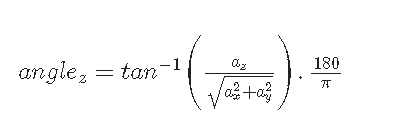

***Z-angle***  : Z-angle, computed using Eq. 3, corresponds to the angle between the accelerometer axis perpendicular to the skin surface and the horizontal plane. As described in “vanHees approach”, any change (or lack of change) in the z-angle over successive time intervals may be an indicator of posture change.

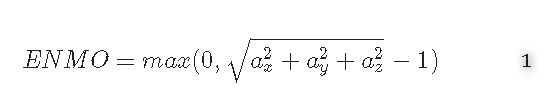

where, ax,ay, and az are median values of the three accelerometer axes computed over a rolling five-second window.

Sleep classification from wrist-worn accelerometer data using random forests: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7794504/#Equ3

feature links (1-4):

https://hackernoon.com/must-know-base-tips-for-feature-engineering-with-time-series-data

https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/

In [12]:
for idx,(test, train, val) in enumerate(zip(test_data, train_data, val_data)):
    train_data[idx] = add_features(train)
    test_data[idx] = add_features(test)
    val_data[idx] = add_features(val)


c:\Users\amoha\Detect-Sleep-States-CMI\notebooks\feature_engineering.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["day of year"] = data.timestamp.dt.dayofyear
c:\Users\amoha\Detect-Sleep-States-CMI\notebooks\feature_engineering.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["day of week"] = data.timestamp.dt.day_of_week #can also do day_name() for the name of the day
c:\Users\amoha\Detect-Sleep-States-CMI\notebooks\feature_engineering.py:23: SettingWithCopyWarning: 
A value is trying

In [13]:
window_size = 5
for idx,(test, train, val) in enumerate(zip(test_data, train_data, val_data)):
    train_data[idx] = pd.concat([train,Create_lag_features(train,window_size,"enmo","anglez")],axis = 1)
    test_data[idx] = pd.concat([test,Create_lag_features(test,window_size,"enmo","anglez")],axis = 1)
    val_data[idx] = pd.concat([val,Create_lag_features(val,window_size,"enmo","anglez")],axis = 1)


In [14]:
train_all = pd.DataFrame()
test_all = pd.DataFrame()
val_all = pd.DataFrame()
for test, train, val in zip(test_data, train_data, val_data):
    train_all = pd.concat([train_all,train],axis = 0)
    test_all = pd.concat([test_all,test],axis = 0)
    val_all = pd.concat([val_all,val],axis = 0)

In [15]:

train_label = train_all.event
val_label =  val_all.event
test_label =  test_all.event 


test_all = test_all.drop("event",axis = 1)
train_all = train_all.drop("event",axis = 1)
val_all = val_all.drop("event",axis = 1)


In [5]:
test_all

,anglez,enmo,series_id,hour,day_quartile,day of year,day of week,month,days in month,minute,enmo lag_1,enmo lag_2,enmo lag_3,enmo lag_4,enmo lag_5,anglez lag_1,anglez lag_2,anglez lag_3,anglez lag_4,anglez lag_5
2150675,-49.101601,0.0000,33,0,0,7,6,1,31,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2150676,-49.101601,0.0000,33,0,0,7,6,1,31,37,0.0000,NaN,NaN,NaN,NaN,-49.101601,NaN,NaN,NaN,NaN
2150677,-49.101601,0.0000,33,0,0,7,6,1,31,37,0.0000,0.0000,NaN,NaN,NaN,-49.101601,-49.101601,NaN,NaN,NaN
2150678,-49.101601,0.0000,33,0,0,7,6,1,31,37,0.0000,0.0000,0.0000,NaN,NaN,-49.101601,-49.101601,-49.101601,NaN,NaN
2150679,-49.101601,0.0000,33,0,0,7,6,1,31,38,0.0000,0.0000,0.0000,0.0000,NaN,-49.101601,-49.101601,-49.101601,-49.101601,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13620939,26.037600,0.0240,221,18,3,347,2,12,31,1,0.0239,0.0240,0.0239,0.0247,0.0241,26.069401,26.058399,26.052999,25.641001,25.493500
13620940,26.031401,0.0237,221,18,3,347,2,12,31,2,0.0240,0.0239,0.0240,0.0239,0.0247,26.037600,26.069401,26.058399,26.052999,25.641001
13620941,26.043699,0.0242,221,18,3,347,2,12,31,2,0.0237,0.0240,0.0239,0.0240,0.0239,26.031401,26.037600,26.069401,26.058399,26.052999
13620942,26.089199,0.0236,221,18,3,347,2,12,31,2,0.0242,0.0237,0.0240,0.0239,0.0240,26.043699,26.031401,26.037600,26.069401,26.058399


In [16]:
# %store train_label
# %store val_label
# %store test_label

# %store test_all
# %store train_all
# %store val_all

Stored 'train_label' (Series)
Stored 'val_label' (Series)
Stored 'test_label' (Series)
Stored 'test_all' (DataFrame)
Stored 'train_all' (DataFrame)
Stored 'val_all' (DataFrame)


In [2]:
# %store -r train_label
# %store -r val_label
# %store -r test_label

# %store -r test_all
# %store -r train_all
# %store -r val_all

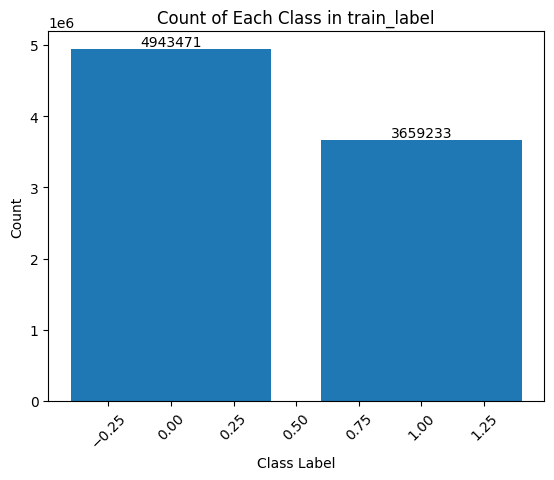

In [17]:
unique_classes, counts = np.unique(train_label, return_counts=True)

# Create a bar plot for each class count within the category
fig, ax = plt.subplots()
ax.bar(unique_classes, counts, label='Counts')

# Add labels and title
ax.set_xlabel('Class Label')
ax.set_ylabel('Count')
ax.set_title('Count of Each Class in train_label')

# Show individual values above each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

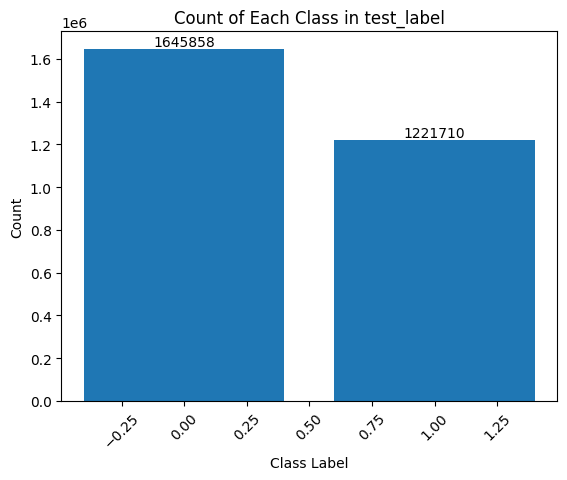

In [18]:
unique_classes, counts = np.unique(test_label, return_counts=True)

# Create a bar plot for each class count within the category
fig, ax = plt.subplots()
ax.bar(unique_classes, counts, label='Counts')

# Add labels and title
ax.set_xlabel('Class Label')
ax.set_ylabel('Count')
ax.set_title('Count of Each Class in test_label')

# Show individual values above each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

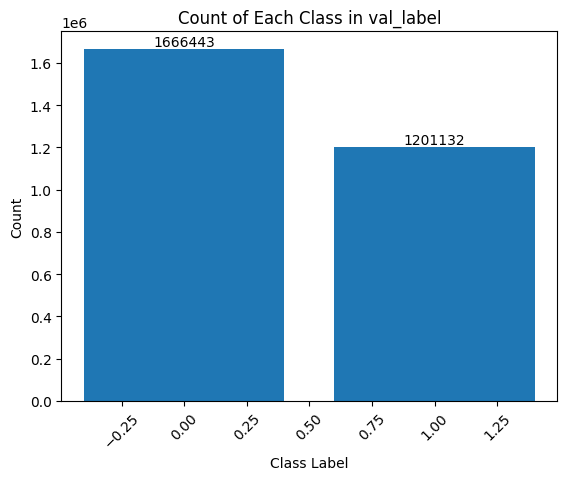

In [19]:
unique_classes, counts = np.unique(val_label, return_counts=True)

# Create a bar plot for each class count within the category
fig, ax = plt.subplots()
ax.bar(unique_classes, counts, label='Counts')

# Add labels and title
ax.set_xlabel('Class Label')
ax.set_ylabel('Count')
ax.set_title('Count of Each Class in val_label')

# Show individual values above each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

In [22]:
test_all = test_all.drop(["step","timestamp","date","time"],axis = 1).reset_index(drop = True)
train_all = train_all.drop(["step","timestamp","date","time"],axis = 1).reset_index(drop = True)
val_all = val_all.drop(["step","timestamp","date","time"],axis = 1).reset_index(drop = True)

In [23]:
duplicated_columns = train_data[0].columns[train_data[0].columns.duplicated()]
duplicated_columns

Index([], dtype='object')

In [12]:
!pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [24]:

from sklearn.ensemble import HistGradientBoostingClassifier  # Import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load your data
X_train, y_train = train_all, train_label
X_val, y_val = val_all, val_label
X_test, y_test = test_all, test_label

# Initialize a HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the validation data
val_predictions = model.predict(X_val)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict on the test data
test_predictions = model.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\amoha\anaconda3\envs\Detect-Sleep-States-CMI\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               

Validation Accuracy: 0.7247925511974403
Test Accuracy: 0.7063686022441316


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the validation data
val_predictions = model.predict(X_val)

# Calculate the validation accuracy
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Calculate additional evaluation metrics for validation data
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1_score = f1_score(y_val, val_predictions)

print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1_score)

# Predict on the test data
test_predictions = model.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

# Calculate additional evaluation metrics for test data
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Validation Accuracy: 0.7247925511974403
Validation Precision: 0.6635210489379472
Validation Recall: 0.6958394248092633
Validation F1 Score: 0.6792960571658929
Test Accuracy: 0.7063686022441316
Test Precision: 0.6528625444051879
Test Recall: 0.6636902374540603
Test F1 Score: 0.6582318659632209


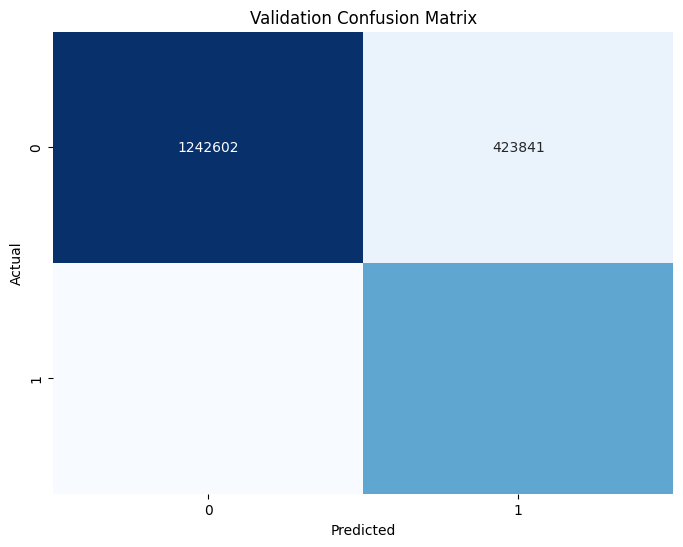

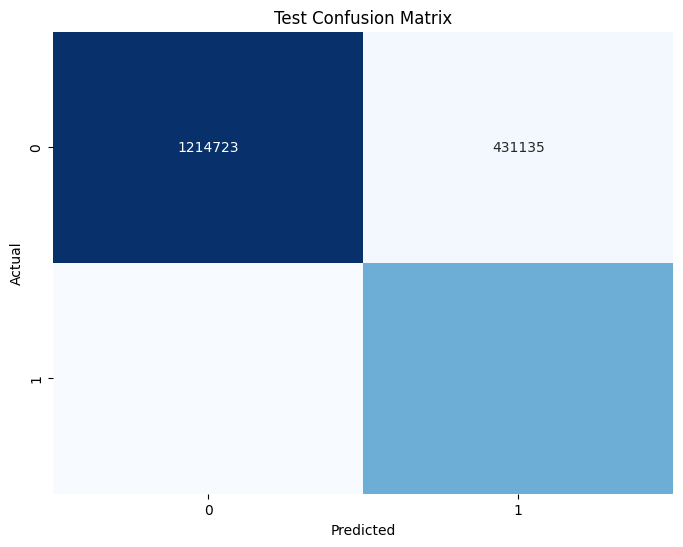

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the validation data
val_predictions = model.predict(X_val)

# Confusion matrix for validation data
val_confusion_matrix = confusion_matrix(y_val, val_predictions)

# Plot confusion matrix for validation data
plt.figure(figsize=(8, 6))
sns.heatmap(val_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Predict on the test data
test_predictions = model.predict(X_test)

# Confusion matrix for test data
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()


Test Accuracy: 1.0


IndexError: index 1 is out of bounds for axis 1 with size 1

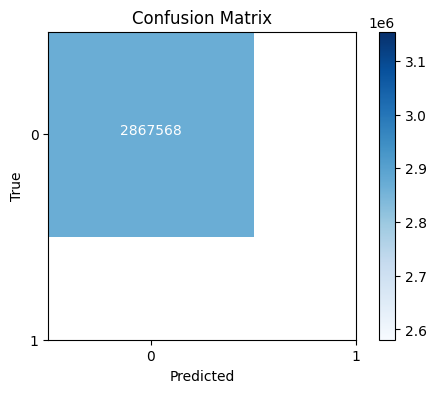

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load your data and train the model as shown in the previous code

# Predict on the test data
test_predictions = model.predict(X_test)
test_probabilities = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC curve

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted")
plt.ylabel("True")
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")
plt.show()

# Print the classification report
print("Classification Report:\n", classification_report(y_test, test_predictions))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
roc_auc = roc_auc_score(y_test, test_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(df[10:])

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
n_components = 60
pca = PCA(n_components = n_components)
pca.fit(train)
pca_tr = pca.fit_transform(train)